In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

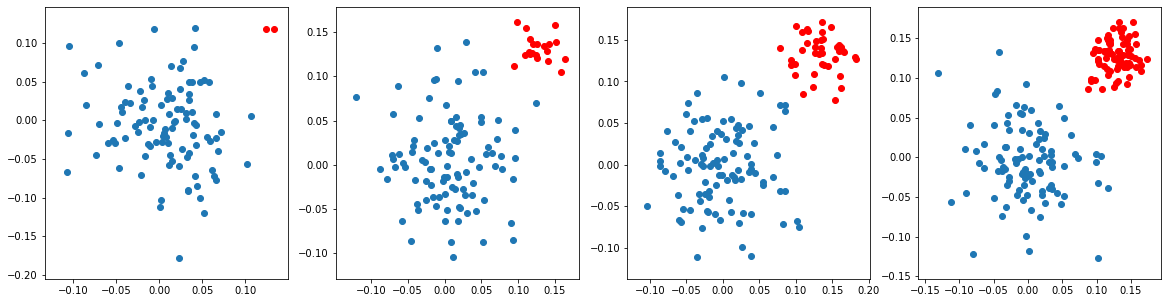

In [3]:
# here we are creating 2d imbalanced data points 
np.random.seed(1234)
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

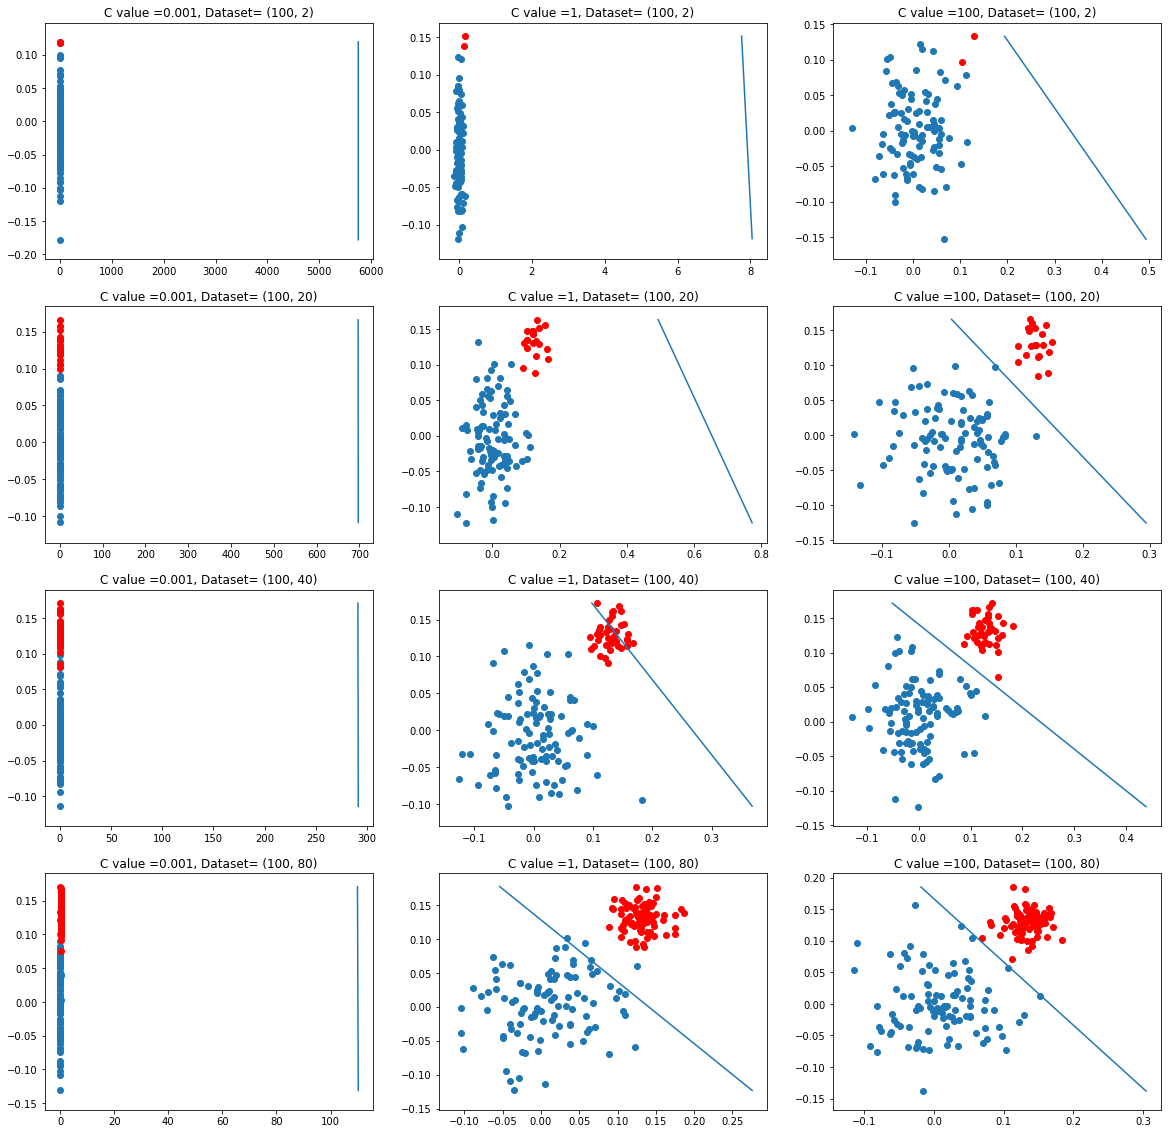

In [4]:
np.random.seed(1234)
#plt.subplots(4,3)
C=[0.001,1,100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
value=1
for j,i in enumerate(ratios):
    for k in range(0,len(C)):
        plt.subplot(4, 3, value)
        value=value+1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        clf = SVC(C=C[k],kernel='linear')
        clf.fit(X,y)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('C value ='+str(C[k])+', Dataset= '+str(i))
        draw_line(coef=clf.coef_.reshape(-1),intercept=clf.intercept_,mi=min(X[:,1]),ma=max(X[:,1]))
plt.show()


<h3>Inferences</h3>

C is a hyperparameter which tells us in SVM how much could we be able to avoid misclassification.
Having high C value will result in having short margin, which tends to overfit the model, which causes poor generalization
Having very low C value may result in having wide margin, but it will tend to underfit the model

<b>Case 1: Highly Imbalanced Dataset (100,2):</b>
        
In this case, the number of positive points outweighs the number of negative points. Since more positive points were there, SVMs may learn to classify everything as positive and completely ignore the negative ones. So to achieve the correct classification, C value must be very high.

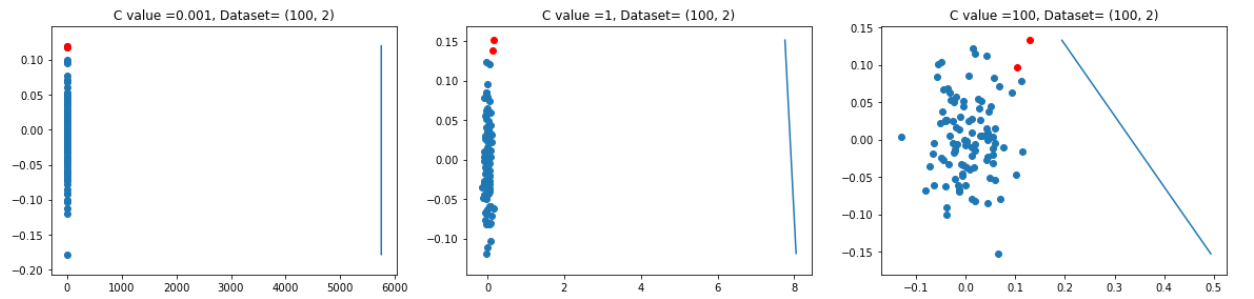

In this image, where most positive points outweighs the negative points, SVM is trying to classify everything as positive

<b>Case 2: Highly Imbalanced Dataset(100,20):</b>

Much amount of Imbalance is also present in this dataset. Unless C value is very high, this classifies everything as positive.

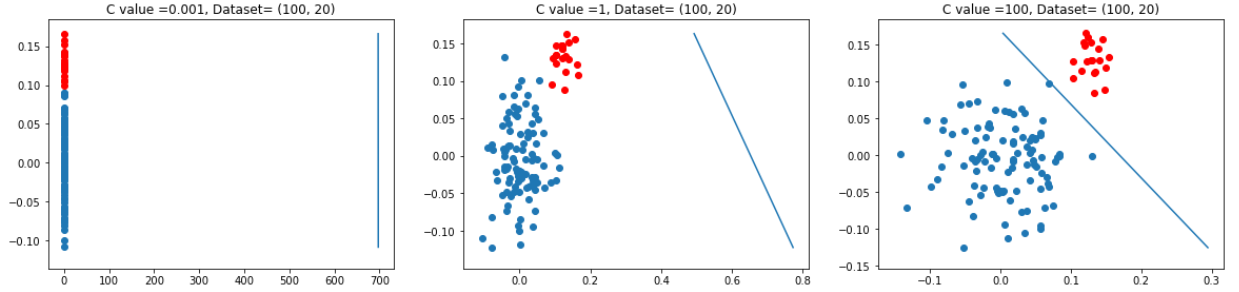

Note that for less C value 1 and 0.001 everything is classified as positive and for a higher C value, model tries to classify but still in vain

<b> Case 3: Imbalanced Dataset(100,40): </b>

In this case when C value is low, in wider margin, it could not be able to classify well, but with stringent margin (higher C), it does the job.

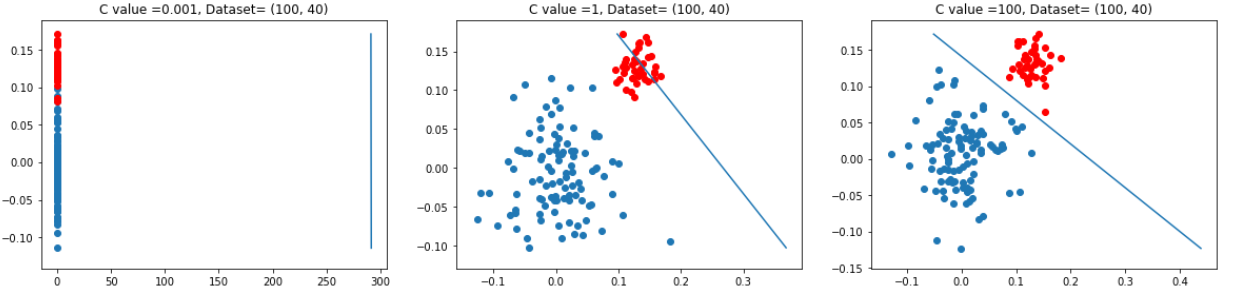


<b> Case 4 : Less Imbalanced data: </b>

With very low C value, it classifies everything as a positive point, but with optimal C values it classifies correctly

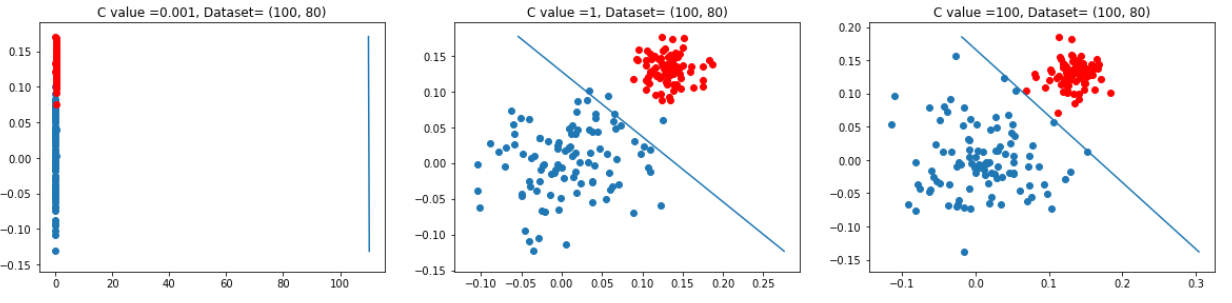

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

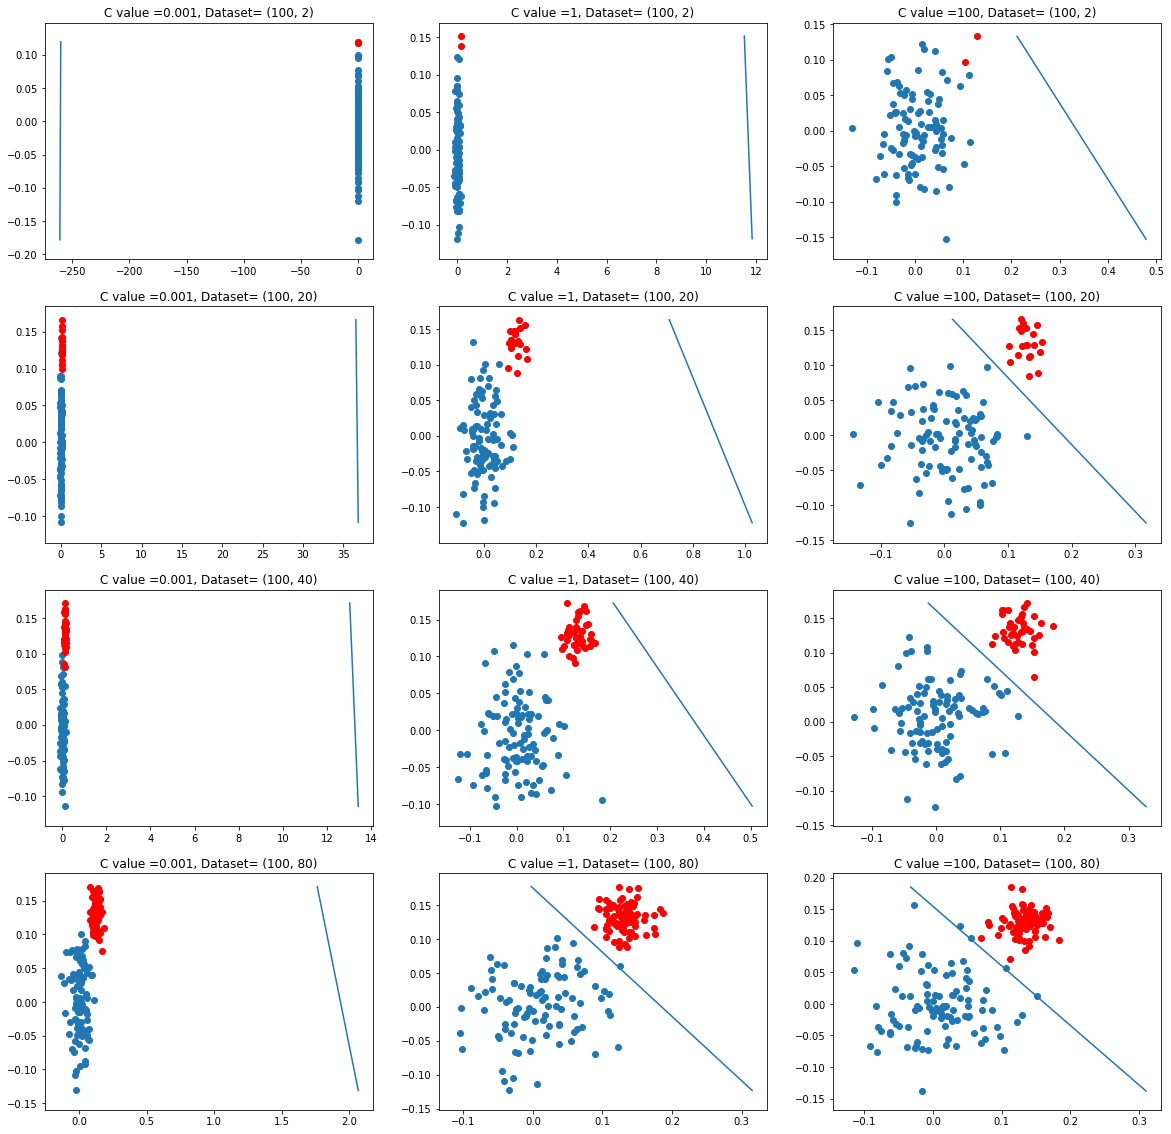

In [5]:
np.random.seed(1234)
#plt.subplots(4,3)
C=[0.001,1,100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,20))
value=1
for j,i in enumerate(ratios):
    for k in range(0,len(C)):
        plt.subplot(4, 3, value)
        value=value+1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        clf = LogisticRegression(C=C[k])
        clf.fit(X,y)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('C value ='+str(C[k])+', Dataset= '+str(i))
        draw_line(coef=clf.coef_.reshape(-1),intercept=clf.intercept_,mi=min(X[:,1]),ma=max(X[:,1]))
plt.show()

C in logistic regression is called as Inverse of Regularization Strength. C is the Inverse of Lambda

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

Since C is inverse of lambda, high value of C overfits and low value of C underfits

Other observations are as same as SVM